In [1]:
# Build perceptron binary model in simple dataset (based on the decision of accepting a tennis lesson or not)
# Train it using perceptron rule

import numpy as np
import pandas as pd

## DATA PREPARATION

In [2]:
data = pd.read_csv('Perceptron_data.csv')

In [3]:
data.head()

,Far_10miles,New_client,Parent_involved,Lesson_accepted
0,1,1,0,1
1,1,0,0,1
2,0,0,1,1
3,1,1,1,0
4,0,1,1,0


In [4]:
n_samples = data.shape[0]
n_features = data.shape[1] - 1

print('# of samples: ', n_samples)
print('# of features: ', n_features)

# of samples:  30
# of features:  3


In [5]:
# Convert data to numpy array and shuffle it
data = np.array(data)
np.random.shuffle(data)

In [6]:
# Shuffle check
data[0:4]

array([[1, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 0, 1]])

In [7]:
# Divide into training and validation set
data_train = data[0:20]
data_valid = data[20:30]
print(len(data_train), len(data_valid))

20 10


In [8]:
# Divide into features and labels
x_train = data_train[:,0:3] # training features
y_train = data_train[:,3] # training labels

x_valid = data_valid[:,0:3] # validation features
y_valid = data_valid[:,3] # validation labels

## TRAINING

In [9]:
# Activation function
def unit_step_func(linear_output):
    return np.where(linear_output > 0, 1, 0)

In [10]:
# Define function to make predictions based on the perceptron
def predict(x, w, b):
    linear_output = np.dot(x, w) + b
    y_pred = unit_step_func(linear_output)
    return y_pred

# Define function to calculate accuracy of the model
def accuracy(y_actual, y_pred):
    return np.sum(y_actual == y_pred) / len(y_actual)

In [11]:
# Define function to train model
def perceptron_training(x, y, iters, weights, bias, learning_rate):
    for i in range(iters):
        # loop through each sample, keeping the index of the sample and the data on the given sample
        for idx, x_i in enumerate(x):

            # sum over the dot product between sample and weights, add the bias
            linear_output = np.dot(x_i, weights) + bias

            # pass the linear output through the activation function to convert it into a binary value (the model's output)
            y_pred = unit_step_func(linear_output)

            # Perceptron update rule - calculate desired change in weights and update them
            delta_w = learning_rate * (y[idx] - y_pred)
            weights += delta_w * x_i
            bias += delta_w
         
        if (i % 10) == 0:
            preds = predict(x, weights, bias)
            print(weights)
            print(bias)
            print(i, ': ', accuracy(y, preds))
            print('----------')
    preds = predict(x, weights, bias)
    print(weights)
    print(bias)
    print(i, ': ', accuracy(y, preds))
    print('----------')
    
    return weights, bias

In [12]:
# Initialize weights and bias
w1 = np.zeros(n_features)
b1 = 0

# Decide on learning rate
lr = 0.01

# Decide on number of training iterations (epochs)
n_iters = 50

In [13]:
# Train based on initial data
w1, b1 = perceptron_training(x_train, y_train, n_iters, w1, b1, lr)

[ 0.01 -0.02  0.  ]
0.0
0 :  0.55
----------
[ 0.   -0.02 -0.01]
0.0
10 :  0.5
----------
[ 0.   -0.02 -0.01]
0.0
20 :  0.5
----------
[ 0.   -0.02 -0.01]
0.0
30 :  0.5
----------
[ 0.   -0.02 -0.01]
0.0
40 :  0.5
----------
[ 0.   -0.02 -0.01]
0.0
49 :  0.5
----------


[0.0452133  0.01585881]
0.11999999999999998
0 :  0.975
----------
[0.06392119 0.05745938]
0.26000000000000006
10 :  1.0
----------
[0.06392119 0.05745938]
0.26000000000000006
20 :  1.0
----------
[0.06392119 0.05745938]
0.26000000000000006
30 :  1.0
----------
[0.06392119 0.05745938]
0.26000000000000006
40 :  1.0
----------
[0.06392119 0.05745938]
0.26000000000000006
49 :  1.0
----------
predictions [1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0]
acc 1.0


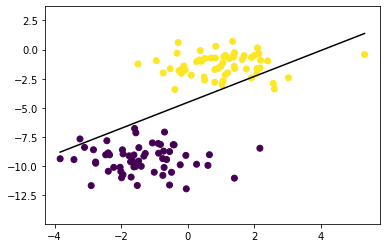

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

w1 = np.zeros(2)

w1, b1 = perceptron_training(X_train, y_train, n_iters, w1, b1, lr)
predictions = predict(X_test, w1, b1)
print("predictions", predictions)

print("acc", accuracy(y_test, predictions))


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (w1[0] * x0_1 - b1) / w1[1]
x1_2 = (w1[0] * x0_2 - b1) / w1[1]

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()